In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn
pd.options.display.mpl_style = 'default'

In [137]:
df = pd.read_csv('./data/energydata_complete.csv')

In [138]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [148]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

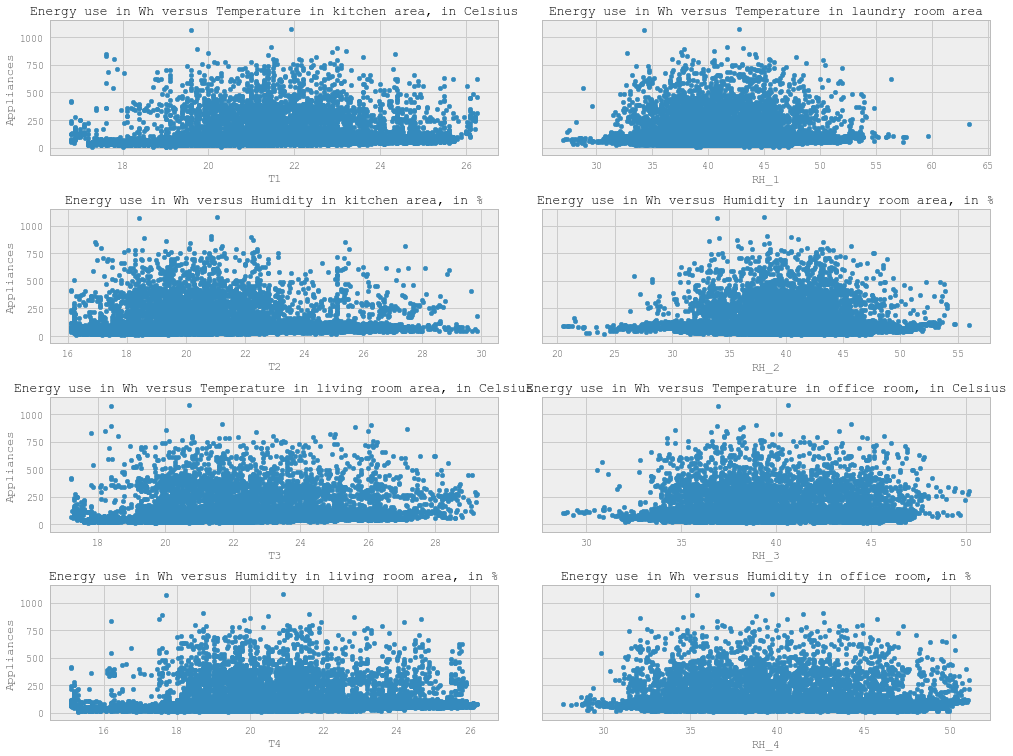

In [149]:
fig, ax = plt.subplots(4, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.1)

df.plot(kind = 'scatter', x = 'T1', y = 'Appliances', ax = ax[0,0])
df.plot(kind = 'scatter', x = 'RH_1', y = 'Appliances', ax = ax[0,1])
df.plot(kind = 'scatter', x = 'T2', y = 'Appliances', ax = ax[1,0])
df.plot(kind = 'scatter', x = 'RH_2', y = 'Appliances', ax = ax[1,1])
df.plot(kind = 'scatter', x = 'T3', y = 'Appliances', ax = ax[2,0])
df.plot(kind = 'scatter', x = 'RH_3', y = 'Appliances', ax = ax[2,1])
df.plot(kind = 'scatter', x = 'T4', y = 'Appliances', ax = ax[3,0])
df.plot(kind = 'scatter', x = 'RH_4', y = 'Appliances', ax = ax[3,1])

ax[0,0].set_title('Energy use in Wh versus Temperature in kitchen area, in Celsius', fontsize = 13)
ax[1,0].set_title('Energy use in Wh versus Humidity in kitchen area, in %', fontsize = 13)
ax[2,0].set_title('Energy use in Wh versus Temperature in living room area, in Celsius', fontsize = 13)
ax[3,0].set_title('Energy use in Wh versus Humidity in living room area, in %', fontsize = 13)
ax[0,1].set_title('Energy use in Wh versus Temperature in laundry room area', fontsize = 13)
ax[1,1].set_title('Energy use in Wh versus Humidity in laundry room area, in %', fontsize = 13)
ax[2,1].set_title('Energy use in Wh versus Temperature in office room, in Celsius', fontsize = 13)
ax[3,1].set_title('Energy use in Wh versus Humidity in office room, in %', fontsize = 13)

plt.show()

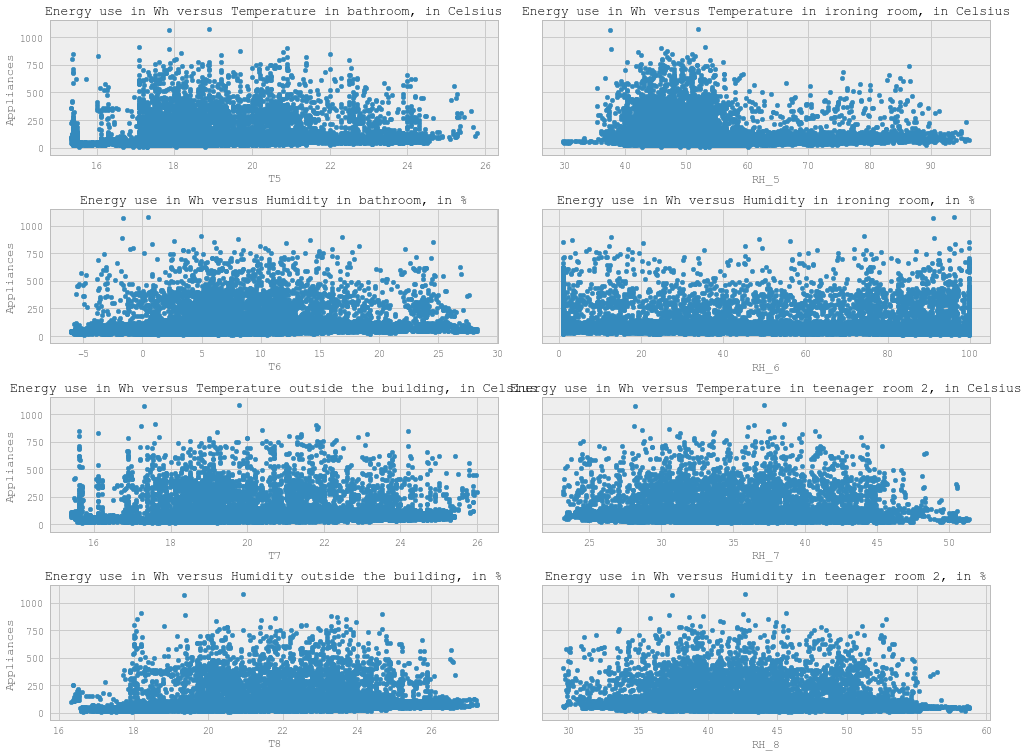

In [150]:
fig, ax = plt.subplots(4, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.1)

df.plot(kind = 'scatter', x = 'T5', y = 'Appliances', ax = ax[0,0])
df.plot(kind = 'scatter', x = 'RH_5', y = 'Appliances', ax = ax[0,1])
df.plot(kind = 'scatter', x = 'T6', y = 'Appliances', ax = ax[1,0])
df.plot(kind = 'scatter', x = 'RH_6', y = 'Appliances', ax = ax[1,1])
df.plot(kind = 'scatter', x = 'T7', y = 'Appliances', ax = ax[2,0])
df.plot(kind = 'scatter', x = 'RH_7', y = 'Appliances', ax = ax[2,1])
df.plot(kind = 'scatter', x = 'T8', y = 'Appliances', ax = ax[3,0])
df.plot(kind = 'scatter', x = 'RH_8', y = 'Appliances', ax = ax[3,1])

ax[0,0].set_title('Energy use in Wh versus Temperature in bathroom, in Celsius', fontsize = 13)
ax[1,0].set_title('Energy use in Wh versus Humidity in bathroom, in %', fontsize = 13)
ax[2,0].set_title('Energy use in Wh versus Temperature outside the building, in Celsius', fontsize = 13)
ax[3,0].set_title('Energy use in Wh versus Humidity outside the building, in %', fontsize = 13)
ax[0,1].set_title('Energy use in Wh versus Temperature in ironing room, in Celsius', fontsize = 13)
ax[1,1].set_title('Energy use in Wh versus Humidity in ironing room, in %', fontsize = 13)
ax[2,1].set_title('Energy use in Wh versus Temperature in teenager room 2, in Celsius', fontsize = 13)
ax[3,1].set_title('Energy use in Wh versus Humidity in teenager room 2, in %', fontsize = 13)

plt.show()

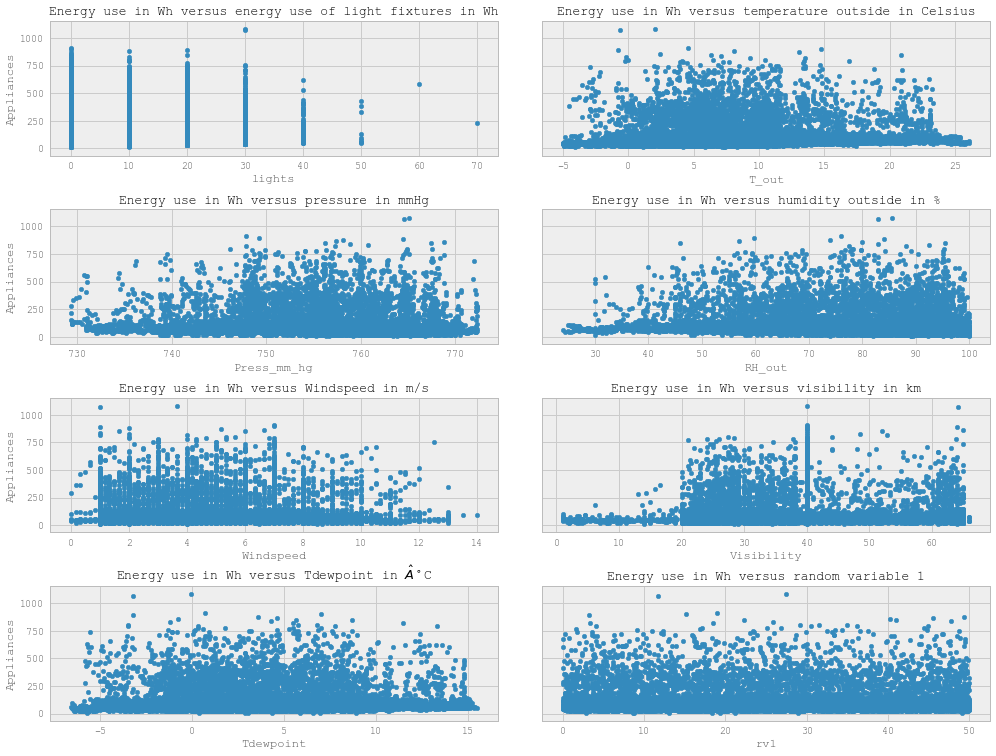

In [151]:
fig, ax = plt.subplots(4, 2, sharey='row', figsize = (15, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.1)

df.plot(kind = 'scatter', x = 'lights', y = 'Appliances', ax = ax[0,0])
df.plot(kind = 'scatter', x = 'T_out', y = 'Appliances', ax = ax[0,1])
df.plot(kind = 'scatter', x = 'Press_mm_hg', y = 'Appliances', ax = ax[1,0])
df.plot(kind = 'scatter', x = 'RH_out', y = 'Appliances', ax = ax[1,1])
df.plot(kind = 'scatter', x = 'Windspeed', y = 'Appliances', ax = ax[2,0])
df.plot(kind = 'scatter', x = 'Visibility', y = 'Appliances', ax = ax[2,1])
df.plot(kind = 'scatter', x = 'Tdewpoint', y = 'Appliances', ax = ax[3,0])
df.plot(kind = 'scatter', x = 'rv1', y = 'Appliances', ax = ax[3,1])

ax[0,0].set_title('Energy use in Wh versus energy use of light fixtures in Wh', fontsize = 13)
ax[1,0].set_title('Energy use in Wh versus pressure in mmHg', fontsize = 13)
ax[2,0].set_title('Energy use in Wh versus Windspeed in m/s', fontsize = 13)
ax[3,0].set_title(r'Energy use in Wh versus Tdewpoint in $\hat{A} ^\circ$C', fontsize = 13)
ax[0,1].set_title('Energy use in Wh versus temperature outside in Celsius', fontsize = 13)
ax[1,1].set_title('Energy use in Wh versus humidity outside in %', fontsize = 13)
ax[2,1].set_title('Energy use in Wh versus visibility in km', fontsize = 13)
ax[3,1].set_title('Energy use in Wh versus random variable 1', fontsize = 13)

plt.show()

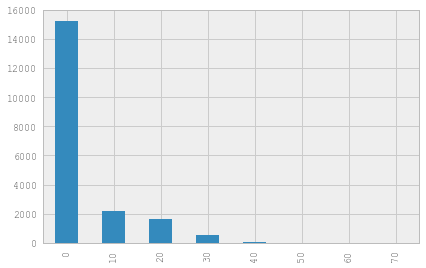

In [152]:
df['lights'].value_counts().plot(kind='bar')

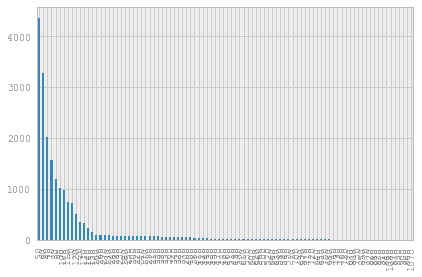

In [153]:
df['Appliances'].value_counts().plot(kind='bar')

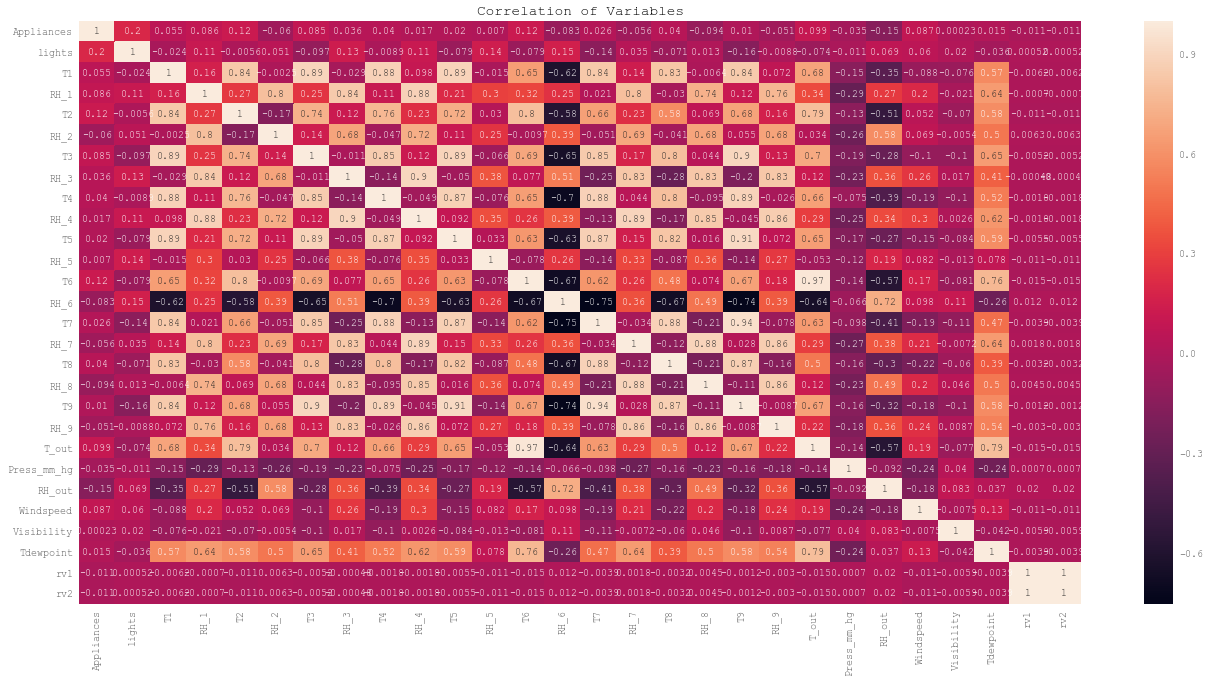

In [154]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation of Variables')
plt.savefig('Correlation Plot')
plt.show() 

In [155]:
df.corr()['Appliances'].sort_values()

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
rv1           -0.011145
rv2           -0.011145
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64

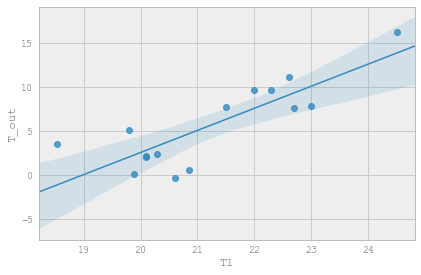

In [157]:
#regression plot
sns.regplot(x="T1", y="T_out", data=df.sample(15, random_state=15))

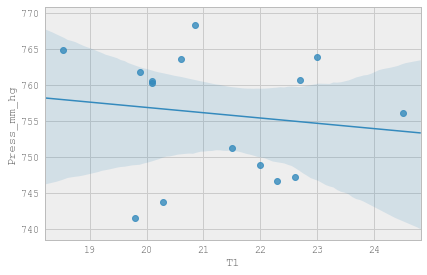

In [158]:
#regression plot
sns.regplot(x="T1", y="Press_mm_hg", data=df.sample(15, random_state=15))

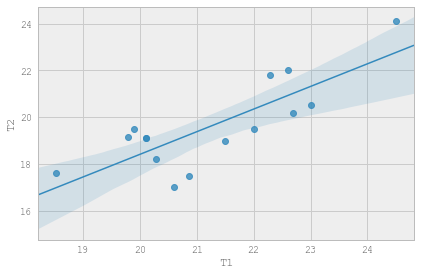

In [159]:
#regression plot
sns.regplot(x="T1", y="T2", data=df.sample(15, random_state=15))

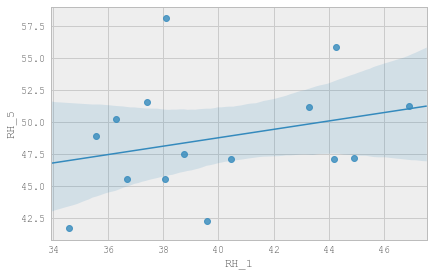

In [160]:
#regression plot
sns.regplot(x="RH_1", y="RH_5", data=df.sample(15, random_state=15))

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#### Question 12

In [163]:
features = ['T2', 'T6']

In [164]:
train = df[features]

In [165]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
features_df = normalised_df.drop(['T6'], axis=1)
target = normalised_df['T6']

In [166]:
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(features_df,target, test_size=split_test_size, random_state=42)

In [167]:
reg_lm=LinearRegression()
reg_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
reg_pred_train = reg_lm.predict(X_train)
reg_pred_test = reg_lm.predict(X_test)

In [169]:
def performance_metrics(model, reg_train, reg_test):
    print("Accuracy on training set:{:.3f}".format(model.score(X_train, y_train))) #accuracy of the model
    print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

    MSE_train= mean_squared_error(y_train, reg_train) # MSE tells you how close a regression line is to a set of points.
    MSE_test= mean_squared_error(y_test, reg_test) #It does this by taking the distances from the points to the regression line and squaring them
    print("MSE Train:", round(MSE_train, 3))
    print("MSE Test:", round(MSE_test, 3))
    RMSE_train=sqrt(MSE_train)
    RMSE_test=sqrt(MSE_test)
    print("RMSE Train:", round(RMSE_train, 3))
    print("RMSE Test:", round(RMSE_test, 3))
    MAE_train = mean_absolute_error(y_train, reg_train) #summation of the differences btw true values and predicted values
    MAE_test = mean_absolute_error(y_test, reg_test)
    print("MAE Train:", round(MAE_train, 2))
    print("MAE Test:", round(MAE_test, 2))
    r2_score_train = r2_score(y_train, reg_train)
    r2_score_test = r2_score(y_test, reg_test) #good r-squared should be close to 1, and between 0 and 1.
    print('R-squared Train:', round(r2_score_train, 2))
    print('R-squared Test:', round(r2_score_test, 2))
    rss_train = np.sum(np.square(y_train - reg_train))
    rss_test = np.sum(np.square(y_test - reg_test))
    print('RSS Train:', round(rss_train, 2))
    print('RSS Test:', round(rss_test, 2)) #RSS is the measure of the amount of variance in a dataset that is not explained by the regression model

In [170]:
performance_metrics(reg_lm, reg_pred_train, reg_pred_test)

Accuracy on training set:0.642
Accuracy on test set: 0.643
MSE Train: 0.011
MSE Test: 0.011
RMSE Train: 0.106
RMSE Test: 0.106
MAE Train: 0.08
MAE Test: 0.08
R-squared Train: 0.64
R-squared Test: 0.64
RSS Train: 155.97
RSS Test: 66.12


#### Answer to Questions 13- 16

In [171]:
features = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']

In [172]:
train = df[features]

In [173]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
features_df = normalised_df.drop(['Appliances'], axis=1)
target = normalised_df['Appliances']

In [174]:
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(features_df,target, test_size=split_test_size, random_state=42)

In [175]:
reg_lm=LinearRegression()
reg_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
reg_pred_train = reg_lm.predict(X_train)
reg_pred_test = reg_lm.predict(X_test)

In [177]:
def performance_metrics(model, reg_train, reg_test):
    print("Accuracy on training set:{:.3f}".format(model.score(X_train, y_train))) #accuracy of the model
    print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

    MSE_train= mean_squared_error(y_train, reg_train) # MSE tells you how close a regression line is to a set of points.
    MSE_test= mean_squared_error(y_test, reg_test) #It does this by taking the distances from the points to the regression line and squaring them
    print("MSE Train:", round(MSE_train, 3))
    print("MSE Test:", round(MSE_test, 3))
    RMSE_train=sqrt(MSE_train)
    RMSE_test=sqrt(MSE_test)
    print("RMSE Train:", round(RMSE_train, 3))
    print("RMSE Test:", round(RMSE_test, 3))
    MAE_train = mean_absolute_error(y_train, reg_train) #summation of the differences btw true values and predicted values
    MAE_test = mean_absolute_error(y_test, reg_test)
    print("MAE Train:", round(MAE_train, 2))
    print("MAE Test:", round(MAE_test, 2))
    r2_score_train = r2_score(y_train, reg_train)
    r2_score_test = r2_score(y_test, reg_test) #good r-squared should be close to 1, and between 0 and 1.
    print('R-squared Train:', round(r2_score_train, 2))
    print('R-squared Test:', round(r2_score_test, 2))
    rss_train = np.sum(np.square(y_train - reg_train))
    rss_test = np.sum(np.square(y_test - reg_test))
    print('RSS Train:', round(rss_train, 2))
    print('RSS Test:', round(rss_test, 2)) #RSS is the measure of the amount of variance in a dataset that is not explained by the regression model

In [178]:
performance_metrics(reg_lm, reg_pred_train, reg_pred_test)

Accuracy on training set:0.145
Accuracy on test set: 0.149
MSE Train: 0.008
MSE Test: 0.008
RMSE Train: 0.089
RMSE Test: 0.088
MAE Train: 0.05
MAE Test: 0.05
R-squared Train: 0.14
R-squared Test: 0.15
RSS Train: 109.39
RSS Test: 45.35


In [133]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

In [135]:
performance_metrics(ridge_reg, ridge_pred_train, ridge_pred_test)

Accuracy on training set:0.145
Accuracy on test set: 0.149
MSE Train: 0.008
MSE Test: 0.008
RMSE Train: 0.089
RMSE Test: 0.088
MAE Train: 0.05
MAE Test: 0.05
R-squared Train: 0.14
R-squared Test: 0.15
RSS Train: 109.42
RSS Test: 45.37


In [116]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

In [118]:
performance_metrics(lasso_reg, lasso_pred_train, lasso_pred_test)

Accuracy on training set:0.025
Accuracy on test set: 0.027
MSE Train: 0.009
MSE Test: 0.009
RMSE Train: 0.095
RMSE Test: 0.094
MAE Train: 0.055
MAE Test: 0.055
R-squared Train: 0.025
R-squared Test: 0.027
RSS Train: 124.7
RSS Test: 51.853


In [119]:
elasticNet_reg = ElasticNet(alpha=0.001)
elasticNet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
elasticNet_pred_train = elasticNet_reg.predict(X_train)
elasticNet_pred_test = elasticNet_reg.predict(X_test)

In [121]:
performance_metrics(elasticNet_reg, elasticNet_pred_train, elasticNet_pred_test)

Accuracy on training set:0.074
Accuracy on test set: 0.077
MSE Train: 0.009
MSE Test: 0.008
RMSE Train: 0.093
RMSE Test: 0.091
MAE Train: 0.053
MAE Test: 0.053
R-squared Train: 0.074
R-squared Test: 0.077
RSS Train: 118.46
RSS Test: 49.202


In [122]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [123]:
linear_model_weights = get_weights_df(reg_lm, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
elasticNet_weights_df = get_weights_df(elasticNet_reg, X_train, 'ElasticNet_weight')

In [124]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elasticNet_weights_df, on='Features')

#### Answer to Question 17 and 19

In [125]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight,ElasticNet_weight
0,RH_2,-0.456698,-0.401134,-0.000000,-0.000000
1,T_out,-0.321860,-0.250765,0.000000,0.000000
2,T2,-0.236178,-0.193880,0.000000,0.021721
3,T9,-0.189941,-0.188584,-0.000000,-0.048044
4,RH_8,-0.157595,-0.156596,-0.000110,-0.084407
5,RH_out,-0.077671,-0.050541,-0.049557,-0.038092
6,RH_7,-0.044614,-0.046291,-0.000000,-0.002863
7,RH_9,-0.039800,-0.041701,-0.000000,-0.000000
8,T5,-0.015657,-0.020727,-0.000000,-0.000000
9,T1,-0.003281,-0.021549,0.000000,0.000000
